In [ ]:
!pip install numpy pandas scikit-learn wandb



In [1]:
!pip install wandb


In [2]:
import wandb
wandb.login(key="8b01be6ff240d1a56153f34f3cda35f1b54dccf3")  # Replace with your actual API key


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: parthsanghvi3030 (parthsanghvi3030-plaksha). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


✅ Image loaded successfully!


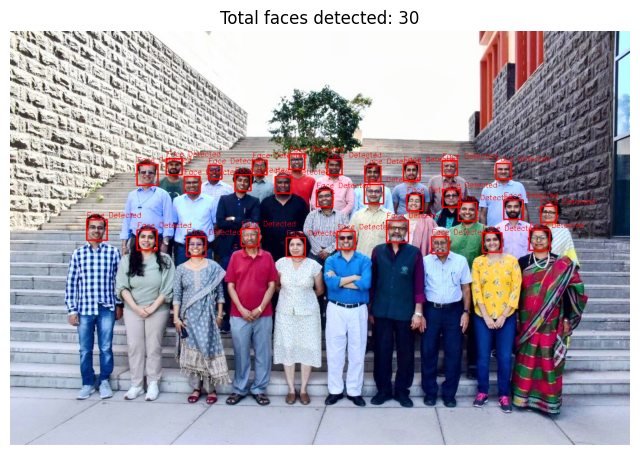

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/mlpr-lab-5-images/Plaksha_Faculty.jpg"
img = cv2.imread(image_path)

# Check if the image loaded correctly
if img is None:
    print(f"❌ ERROR: Image not found at {image_path}")
else:
    print("✅ Image loaded successfully!")

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the Haar cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Apply face detection
    faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

    # Define text and font parameters
    text = "Face Detected"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 255)
    font_thickness = 1

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)

    # Convert image to RGB (because OpenCV loads it in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis("off")  # Hide axis
    plt.title(f"Total faces detected: {len(faces_rect)}")
    plt.show()


✅ Image loaded successfully!
✅ Detected 30 faces.


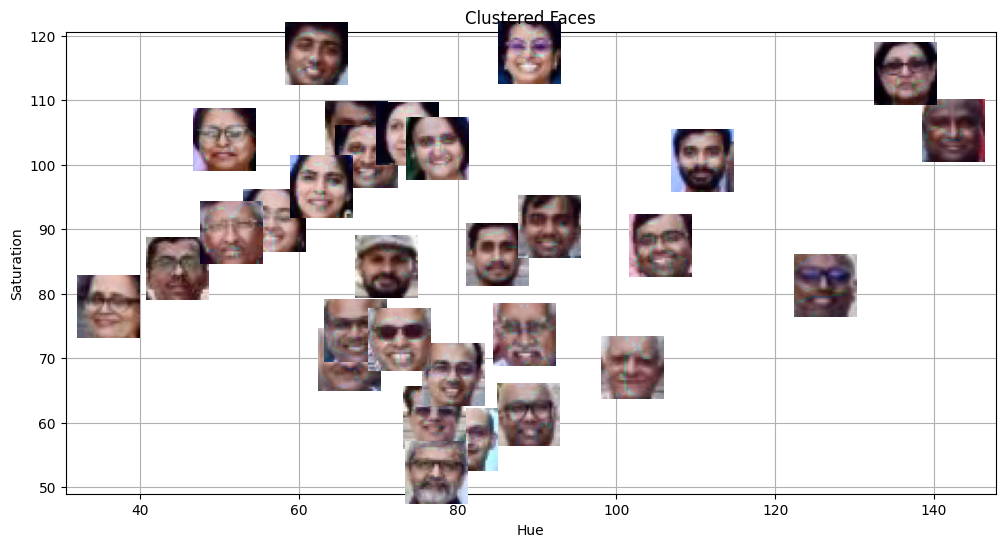

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the image
image_path = "//kaggle/input/mlpr-lab-5-images/Plaksha_Faculty.jpg"
img = cv2.imread(image_path)

if img is None:
    print(f"❌ ERROR: Image not found at {image_path}")
else:
    print("✅ Image loaded successfully!")

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

    if len(faces_rect) == 0:
        print("❌ No faces detected. Exiting...")
    else:
        print(f"✅ Detected {len(faces_rect)} faces.")

        # Convert image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        hue_saturation = []
        face_images = []  # Store cropped face images

        for (x, y, w, h) in faces_rect:
            face = img_hsv[y:y + h, x:x + w]
            hue = np.mean(face[:, :, 0])  # Compute average Hue
            saturation = np.mean(face[:, :, 1])  # Compute average Saturation
            hue_saturation.append((hue, saturation))
            face_images.append(face)

        hue_saturation = np.array(hue_saturation)

        ## Perform k-Means clustering on hue_saturation
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(hue_saturation)

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(12, 6))

        # Plot clustered faces
        for i, (x, y, w, h) in enumerate(faces_rect):
            face_resized = cv2.resize(face_images[i], (30, 30))  # Increase marker size
            im = OffsetImage(cv2.cvtColor(face_resized, cv2.COLOR_HSV2RGB), zoom=1.5)
            ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0.2)
            ax.add_artist(ab)
            plt.scatter(hue_saturation[i, 0], hue_saturation[i, 1], c="red", s=50)  # Plot cluster points

        # Plot settings
        plt.xlabel("Hue")
        plt.ylabel("Saturation")
        plt.title("Clustered Faces")
        plt.grid()
        plt.show()



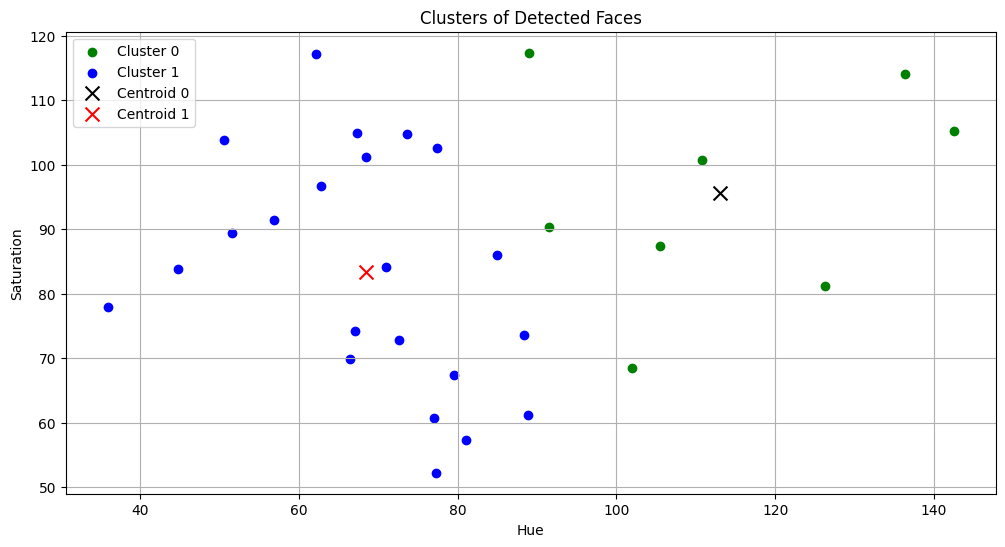

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green

plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')
# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')
## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clusters of Detected Faces")
plt.legend()
plt.grid()
plt.show()

✅ Image loaded successfully!
✅ Detected 1 face(s) in template image.


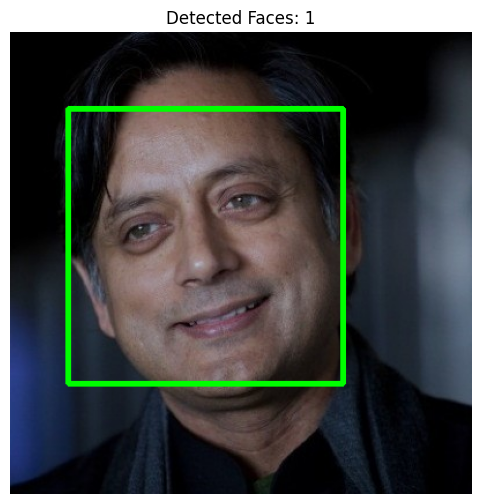

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the template image from Kaggle dataset
template_img_path = "/kaggle/input/mlpr-lab-5-images/Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img_path)

# Check if the image loaded correctly
if template_img is None:
    print(f"❌ ERROR: Image not found at {template_img_path}")
else:
    print("✅ Image loaded successfully!")

    # Convert to grayscale
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the template image
    template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), maxSize=(300, 300))

    # Check if any faces were detected
    if len(template_faces) == 0:
        print("❌ No faces detected in the template image.")
    else:
        print(f"✅ Detected {len(template_faces)} face(s) in template image.")

        # Draw rectangles around detected faces
        for (x, y, w, h) in template_faces:
            cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Convert BGR to RGB for Matplotlib display
        template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

        # Display the image using Matplotlib
        plt.figure(figsize=(8, 6))
        plt.imshow(template_img_rgb)
        plt.axis("off")  # Hide axis
        plt.title(f"Detected Faces: {len(template_faces)}")
        plt.show()


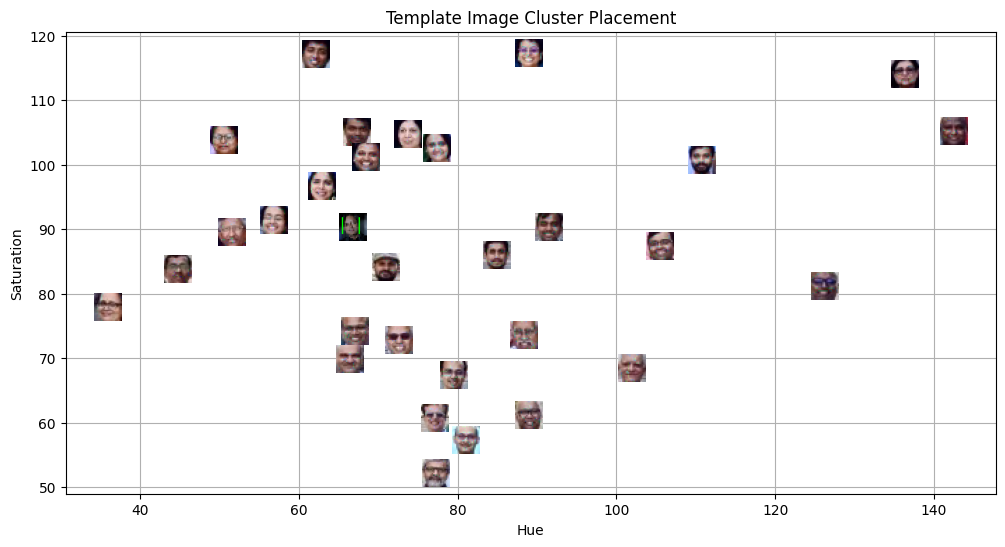

In [10]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label =kmeans.predict([[template_hue, template_saturation]])[0]
# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Cluster Placement")
plt.grid()
plt.show()

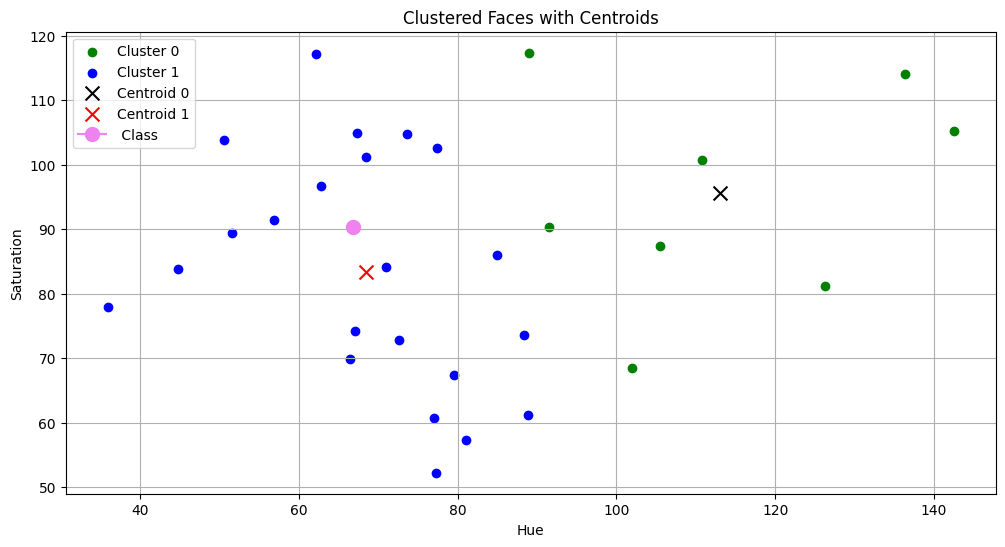

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')
# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')

plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces with Centroids")
plt.legend()
plt.grid()
plt.show()
                                            ## End of the lab 5 ##

In [13]:
import os
print("Files in current directory:", os.listdir())


Files in current directory: ['wandb', '.virtual_documents', 'clustering_plot.png', 'faces_detected.png']


In [15]:
import wandb

# ✅ Initialize WandB at the start
wandb.init(project="distance_classification", name="face-detection-logging")

# Save clustering plot
plt.savefig("clustering_plot.png")
plt.close()
wandb.log({"Face Clustering Plot": wandb.Image("clustering_plot.png")})

# Convert OpenCV image from BGR to RGB before saving
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Save detected faces image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Total Faces Detected: {len(faces_rect)}")
plt.savefig("faces_detected.png")
plt.close()
wandb.log({"Detected Faces Image": wandb.Image("faces_detected.png")})

# ✅ Finish WandB logging
wandb.finish()


1.Euclidean, Manhattan, Minkowski, and Cosine similarity.  
2.Image recognition, recommendation systems, medical diagnosis, and anomaly detection.  
3.Euclidean measures straight-line distance, Manhattan sums absolute differences, Minkowski generalizes both, and Cosine similarity measures vector angles, useful for text and high-dimensional data.
4.Helps assess model performance by splitting data into training and testing sets to prevent overfitting.  
5.Low K leads to high variance (overfitting), while high K increases bias (underfitting).Choosing an optimal K balances both for better performance.